**In this Notebook we work on Titanic passengers database and make predictions on their survival. We use scikit-learn package, please feel free to learn classification in scikit from here https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
Most of the functions needed for the homework are in the notebook, please look at the arguments for each function and play with them to improve your understanding**



In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
from IPython.display import clear_output
from matplotlib import pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')


In [2]:
dftrain.head()


,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


**Explore the dataset by looking at the features. For improving the accuracy you can play with features as well, if you feel some of the features are not needed, you can drop them**

In [3]:
dfeval.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,male,54.0,0,0,51.8625,First,E,Southampton,y
2,female,58.0,0,0,26.5500,First,C,Southampton,y
3,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,male,34.0,0,0,13.0000,Second,D,Southampton,y


**Analyse the dataset, here you find the count, statistics of dataset**

In [4]:
dftrain.describe()


,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


**Look at labeled data of both training and evaluation set**

In [5]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

**In the next few plots you can observe few more things in the dataset like distribution of age of passengers. Make good observations on the features, it might help you push your prediction accuracy**

In [6]:
y_eval.head()

0    0
1    0
2    1
3    1
4    1
Name: survived, dtype: int64

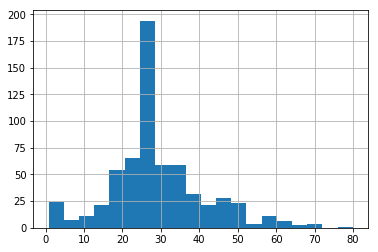

In [7]:
dftrain.age.hist(bins=20)
plt.show()


**Make some observations on the unfortundate :( data set**

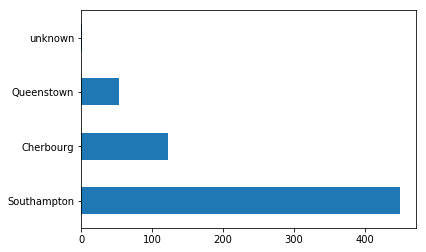

In [8]:
dftrain.embark_town.value_counts().plot(kind='barh')
plt.show()


**Survived passengers for each class**

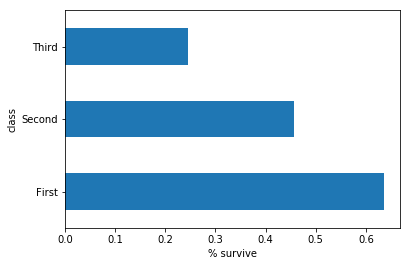

In [9]:
pd.concat([dftrain, y_train], axis=1).groupby('class').survived.mean().plot(kind='barh').set_xlabel('% survive')
plt.show()


**Alright! lets get started! by now you must be wondering how to run learning algorithms on categorial features(we care only about numbers right!). Dataset has categorial features like embark_town, deck, class etc. These are strings but all the algorithms need numericals right. So, we have to change categorial features to numerical features. There are three different ways to do that, here we present one and the easiest way to do that**

In [10]:
# Get dummies
dftrain = pd.get_dummies(dftrain, prefix_sep='_', drop_first=False)
dfeval = pd.get_dummies(dfeval, prefix_sep='_', drop_first=False)
dftrain.shape
dfeval.shape


(264, 22)

**Here we are dropping one of the features to align training and evaluation datasets, you can use this to drop features you might consider unnecessary**

In [11]:
dftrain = dftrain.drop(columns="deck_G")

In [12]:
dftrain.shape

(627, 22)

In [13]:
dfeval.shape


(264, 22)

$\color{red}{\textbf{TASK 1. }}$ *You will implement a Decision tree classifer on the Dataset.*

**Decision Tree Classification**

In [14]:
 dtc = DecisionTreeClassifier(max_depth=1)
dtc.fit(dftrain, y_train)
y_pred = dtc.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Accuracy: 74.24242424242425 %


$\color{red}{\textbf{TASK 2. }}$ *Now perform adaptive boosting for a decision tree classifer. Please play with the depth of the tree.*

**Adaptive boosting for Decision Tree Classification**

In [15]:
abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(dftrain, y_train)

#Predict the response for test dataset
y_pred = model.predict(dfeval)

print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Accuracy: 75.75757575757575 %


$\color{blue}{\textit{Observations: }}$ In fact, when we run different values for max_depth, we see that the highest accuracies are attained somewhere around max_depth values of 100-500. This range is a ballpark estimate of that we will use later for our model.

In [16]:
depth_vals = [5, 10, 50, 100, 500, 1000]

for depth in depth_vals:
    abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=depth),n_estimators=50,
                         learning_rate=1)
    # Train Adaboost Classifer
    model = abc.fit(dftrain, y_train)
    #Predict the response for test dataset
    y_pred = model.predict(dfeval)
    print("Max Depth:",depth,"\t","Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Max Depth: 5 	 Accuracy: 79.16666666666666 %
Max Depth: 10 	 Accuracy: 80.68181818181817 %
Max Depth: 50 	 Accuracy: 82.1969696969697 %
Max Depth: 100 	 Accuracy: 82.95454545454545 %
Max Depth: 500 	 Accuracy: 82.57575757575758 %
Max Depth: 1000 	 Accuracy: 82.57575757575758 %


$\color{red}{\textbf{TASK 3. }}$ *Using the SVM classifer on the dataset, play with different kernels and present your observations.*

**Linear SVM classifier**

In [17]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(dftrain, y_train)
y_pred = svclassifier.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Accuracy: 75.37878787878788 %


$\color{blue}{\textit{Observations: }}$ When testing different kernels - linear, sigmoid, rbf, degree-2 poly - on the SVC model, we see that the degree-2 poly attains the highest accuracy, followed by the linear kernel. (Any degree higher than 2 had a significantly longer computational time and thus was not considered.)

In [18]:
kernel_types = ['linear','sigmoid','rbf','poly']

for kern in kernel_types:
    if kern != 'poly':
        svclassifier = SVC(kernel=kern,gamma='auto')
    else:
        svclassifier = SVC(kernel=kern,gamma='auto',degree=2)
    svclassifier.fit(dftrain, y_train)
    y_pred = svclassifier.predict(dfeval)
    print("Kernel:", kern, "\t", "Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

Kernel: linear 	 Accuracy: 75.37878787878788 %
Kernel: sigmoid 	 Accuracy: 62.5 %
Kernel: rbf 	 Accuracy: 71.96969696969697 %
Kernel: poly 	 Accuracy: 79.16666666666666 %


$\color{red}{\textbf{TASK 4. }}$ *Apply Boosting to the SVM classifers.*

In [19]:

svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=90, base_estimator=svc,learning_rate=.01)

# Train Adaboost Classifer
model = abc.fit(dftrain, y_train)

#Predict the response for test dataset
y_pred = model.predict(dfeval)
print("Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")


Accuracy: 74.24242424242425 %


**Use SVM classifier with polynomial or radial basis function as kernel and later apply boosting and share your observations**

$\color{blue}{\textit{Observations: }}$

Interestingly, applying AdaBoost to a SVM classifier (regardless of using 'linear', 'poly' (deg 2), or 'rbf' for kernel) does little to change the accuracy from the original counterparts. In fact, during some runs, AdaBoost lowered the accuracy for some classifiers. 

In [20]:
# WITHOUT BOOSTING
svclassifier = SVC(gamma='scale',kernel='poly', degree = 2, shrinking = True)
svclassifier.fit(dftrain, y_train)
y_pred = svclassifier.predict(dfeval)

print("NO BOOSTING. ","Kernel: poly","\t","Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

# WITH BOOSTING
svcpoly = SVC(probability=True, gamma='scale',kernel='poly', degree=2)
boostpoly = AdaBoostClassifier(n_estimators=90, base_estimator=svcpoly,learning_rate=.01)
boostpolymodel = boostpoly.fit(dftrain, y_train)
y_pred = boostpolymodel.predict(dfeval)

print("WITH BOOSTING. ","Kernel: poly","\t","Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

NO BOOSTING.  Kernel: poly 	 Accuracy: 66.28787878787878 %
WITH BOOSTING.  Kernel: poly 	 Accuracy: 64.01515151515152 %


In [21]:
# WITHOUT BOOSTING
svclassifier2 = SVC(gamma='scale',kernel='rbf')
svclassifier2.fit(dftrain, y_train)
y_pred = svclassifier2.predict(dfeval)

print("NO BOOSTING. ","Kernel: rbf","\t","Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

# WITH BOOSTING
svcRBF = SVC(probability=True, gamma='scale',kernel='rbf')
boostRBF = AdaBoostClassifier(n_estimators=90, base_estimator=svcRBF,learning_rate=.01)
boostRBFmodel = boostRBF.fit(dftrain, y_train)
y_pred = boostRBFmodel.predict(dfeval)

print("WITH BOOSTING. ","Kernel: rbf","\t","Accuracy:",metrics.accuracy_score(y_eval, y_pred)*100,"%")

NO BOOSTING.  Kernel: rbf 	 Accuracy: 68.93939393939394 %
WITH BOOSTING.  Kernel: rbf 	 Accuracy: 68.93939393939394 %


$\color{red}{\textbf{TASK 5. }}$ *Use your observations on the dataset, and using the above methods, try to improve the accuracy as much as you can. An ideal target is more than 85%.*

**It's all yours now, get the best possible accuracy in doing so understand the concepts we learnt in class. Hold on fellas, one more thing, don't push yourself so hard to get 100% though!**

$\color{blue}{\textit{Explanation: }}$

From Task 4, we saw that applying AdaBoost to an SVM classifier did little to change the accuracy. Therefore, we should look at our options from Tasks 1-3. From all the models presented during Tasks 1-3, SVM with poly (deg-2) kernel had the highest accuracy, followed by AdaBoost for a decision tree. 

However, performing one run for SVM-poly took approximately 10 seconds, and iterating through at least 100 different hyperparameter combinations might not be ideal when considering computational time and power consumption required for the user's personal device (as well as the limitations of the CPU cores). Therefore, we will consider using the AdaBoost-ed decision trees (AdaBoost-DT) classifier in trying to increase its accuracy to at least 85%. 

Note that the provided AdaBoost-DT code block in Task 2 used hyper-parameters max_depth=3, n_estimators=50, and learning_rate=1. As previously discussed in Task 2, we also saw that max_depth values of 100-500 were ideal. For initial runs, we should keep n_estimators and learning_rate values somewhat close to the original code block.

Therefore, it is best to use max_depth values of 100-500, n_estimators of 50-150, and learning_rate values of 0.5-1.5. We fine-tune the model even more as shown below.

To view all results, de-comment the print statement and comment out the modulo if-statement. 

In [22]:
import time
t_init = time.time()

# Fine-tune hyper-parameter ranges
depth_vals = np.arange(start=100, stop=500, step=50)
est_vals = np.arange(start=50, stop=150, step=25)
lr_vals = np.arange(start=0.5, stop=1.5, step=0.1)

# Setup
results = {}
best_val = -1 
best_dep, best_est, best_lr = -1, -1, -1
best_abc = None

# Create set of all possible hyper-parameter combos
hyperparams = [(i,j,k) for i in depth_vals for j in est_vals for k in lr_vals]
total = len(depth_vals) * len(est_vals) * len(lr_vals)
count = 0

# Test each combo
for (i,j,k) in hyperparams:
    abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=i),n_estimators=j,
                         learning_rate=k)
    model = abc.fit(dftrain, y_train)
    y_pred = model.predict(dfeval)
    accur_val = metrics.accuracy_score(y_eval, y_pred)
    results[(i,j,k)] = accur_val
    # print("Max Depth:", i, "Estimators:", j, "Learning Rate:", k, "Accuracy:",accur_val*100,"%")
    count += 1
    if (count % 50) == 0:
        print("%f percent completed. Time elapsed: %fs" % (count/total*100, time.time()-t_init))
    if accur_val > best_val:
        best_val = accur_val
        best_dep, best_est, best_lr = i,j,k
        best_abc = abc
    

t_fin = time.time()
print("Test complete. Time elapsed: %fs" % (t_fin-t_init))

15.625000 percent completed. Time elapsed: 9.786393s
31.250000 percent completed. Time elapsed: 20.482819s
46.875000 percent completed. Time elapsed: 31.446465s
62.500000 percent completed. Time elapsed: 42.598741s
78.125000 percent completed. Time elapsed: 52.346592s
93.750000 percent completed. Time elapsed: 62.319366s
Test complete. Time elapsed: 68.075758s


In [23]:
print("Best accuracy:", best_val*100, "%")
print("Max Depth:", best_dep, "\t", "Estimators:", best_est, "\t", "Learning Rate:", best_lr)

Best accuracy: 85.22727272727273 %
Max Depth: 100 	 Estimators: 100 	 Learning Rate: 0.7999999999999999
